In [1]:
import numpy as np
import xarray as xr

In [2]:
import os
import glob

In [3]:
import cmip6_preprocessing.preprocessing as cpp

In [4]:
import proplot as pplt
import matplotlib as plt

In [5]:
import xesmf as xe

In [6]:
models=['ACCESS-ESM1-5','AWI-ESM-1-1-LR','CESM2','CNRM-CM6-1','EC-Earth3-LR','FGOALS-g3','GISS-E2-1-G',\
        'HadGEM3-GC31-LL','INM-CM4-8','IPSL-CM6A-LR','MIROC-ES2L','NESM3','NorESM2-LM']


In [7]:
def combined_preprocessing(ds_in):
    ds=ds_in.copy()
    ds=cpp.rename_cmip6(ds)
    ds=cpp.broadcast_lonlat(ds)
#     ds=cpp.correct_lon(ds)
#     ds=cpp.parse_lon_lat_bounds(ds)
#     ds=cpp.maybe_convert_vertex_to_bounds(ds)
#     ds=cpp.maybe_convert_bounds_to_vertex(ds)

    return ds

In [8]:
def get_var_LIG(var): 
    var_dic={}
    for model in models:
        print(model)
        try:
            files=glob.glob('/home/users/rahuls/LOUISE/PMIP_LIG/ESGF_download/CMIP6/model-output/ocean/'+var+'/'+var+'_Omon_'+model+'_lig127k_*.nc')
            if not files:
                print(model+' LIG data not avaialbe')
                continue
            if any("_gr_" in filename for filename in files):
                print('LIG of '+model+' in native grid')
          
            if not any("r1i1p1f1" in filename for filename in files):
                index=files[0].index('_lig127k_')+9
                ens_name=files[0][index:index+9]
                print('LIG of '+model+' ensemble is '+ens_name)
            
            ds=xr.open_mfdataset(paths=files,use_cftime=True,parallel=True)  
            var_dic[model]=combined_preprocessing(ds.isel(time=slice(-2400,None)))
        except OSError as err:
            print('LIG of '+model+' not readable' , err)
            continue
        
    return var_dic   

In [9]:
lig_SST=get_var_LIG('tos')

ACCESS-ESM1-5
AWI-ESM-1-1-LR
CESM2


/home/users/qino/miniconda3/envs/deepice/lib/python3.10/site-packages/xarray/conventions.py:521: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


CNRM-CM6-1
LIG of CNRM-CM6-1 ensemble is r1i1p1f2_
EC-Earth3-LR
FGOALS-g3
GISS-E2-1-G
HadGEM3-GC31-LL
HadGEM3-GC31-LL LIG data not avaialbe
INM-CM4-8
INM-CM4-8 LIG data not avaialbe
IPSL-CM6A-LR
MIROC-ES2L
LIG of MIROC-ES2L ensemble is r1i1p1f2_
NESM3
NorESM2-LM


In [17]:
lig_SST['GISS-E2-1-G']

<xarray.Dataset>
Dimensions:      (time: 2400, bnds: 2, y: 90, x: 144)
Coordinates:
  * time         (time) object 2900-01-16 12:00:00 ... 3199-12-16 12:00:00
  * y            (y) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * x            (x) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
    lon          (x, y) float64 1.25 1.25 1.25 1.25 ... 358.8 358.8 358.8 358.8
    lat          (x, y) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
Dimensions without coordinates: bnds
Data variables:
    time_bounds  (time, bnds) object dask.array<chunksize=(600, 2), meta=np.ndarray>
    lat_bounds   (time, y, bnds) float64 dask.array<chunksize=(600, 90, 2), meta=np.ndarray>
    lon_bounds   (time, x, bnds) float64 dask.array<chunksize=(600, 144, 2), meta=np.ndarray>
    tos          (time, y, x) float32 dask.array<chunksize=(600, 90, 144), meta=np.ndarray>
Attributes: (12/41)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            PMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    contact:                Kenneth Lo (cdkkl@giss.nasa.gov)
    ...                     ...
    title:                  GISS-E2-1-G output prepared for CMIP6
    tracking_id:            hdl:21.14100/69b6692e-f4ec-413c-94fb-f593240f465e
    variable_id:            tos
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by NASA Goddard Institu...
    cmor_version:           3.3.2

In [10]:
# HADCM3 from vittorias LIG Simulation 
model = 'HadGEM3-GC31-LL'
file='/home/users/rahuls/LOUISE/PMIP_LIG/Vittoria_LIG_run_links/uba937_ThetaSo_18502050.nc'
ds=xr.open_dataset(file)  
sst=ds.thetao.isel(time=slice(-2400,None),deptht=0,drop=True)
lig_SST[model]=sst.to_dataset().rename(dict(thetao='tos'))

In [11]:
def get_var_PI(var):
    var_dic={}
    for model in models:
        print(model)
        files_LIG=glob.glob('/home/users/rahuls/LOUISE/PMIP_LIG/ESGF_download/CMIP6/model-output/ocean/'+var+'/'+var+'_Omon_'+model+'_lig127k_*.nc')
        try:
            index=files_LIG[0].index('_lig127k_')+9
            ens=files_LIG[0][index:index+8]
        except:
            print(model+'no LIG, trying r1i1p1f1')
            ens='r1i1p1f1'
        try:
            files=glob.glob('/home/users/rahuls/LOUISE/PMIP_LIG/piControl_CEDA_Links/'+var+'/'+var+'_Omon_'+model+'_piControl_'+ens+'*.nc')
            
            if not files:
                print(model+' PI data ensemble is not same as LIG')
                files=glob.glob('/home/users/rahuls/LOUISE/PMIP_LIG/piControl_CEDA_Links/'+var+'/'+var+'_Omon_'+model+'_piControl_*.nc')
                if not files:
                    print(model+' PI data not avaialbe')
                    continue
                
            if any("_gr_" in filename for filename in files):
                print('PI of '+model+' in native grid')
                
#             if not any("r1i1p1f1" in filename for filename in files):
#                 index=files[0].index('_piControl_')+11
#                 ens_name=files[0][index:index+8]
#                 print('PI of '+model+' ensemble is '+ens_name)
            
            ds=xr.open_mfdataset(paths=files,use_cftime=True,parallel=True)  
#             ds = cpp.parse_lon_lat_bounds(ds)
#             ds = cpp.maybe_convert_bounds_to_vertex(ds)
#             ds = cpp.maybe_convert_vertex_to_bounds(ds)
            var_dic[model]=combined_preprocessing(ds.isel(time=slice(-2400,None)))

        except Exception as err:
            print(err,'PI of '+model+'in CEDA not readable' )
            
    
    return var_dic

In [12]:
PI_SST=get_var_PI('tos')

ACCESS-ESM1-5
AWI-ESM-1-1-LR
CESM2


/home/users/qino/miniconda3/envs/deepice/lib/python3.10/site-packages/xarray/conventions.py:521: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


CNRM-CM6-1
EC-Earth3-LR
FGOALS-g3
GISS-E2-1-G
HadGEM3-GC31-LL
HadGEM3-GC31-LLno LIG, trying r1i1p1f1
INM-CM4-8
INM-CM4-8no LIG, trying r1i1p1f1
INM-CM4-8 PI data ensemble is not same as LIG
INM-CM4-8 PI data not avaialbe
IPSL-CM6A-LR
MIROC-ES2L
NESM3
NorESM2-LM


In [13]:
def regrid(ds_in,variable):
    var=ds_in[variable]
    ds_out = xe.util.grid_global(1,1)
    regridder = xe.Regridder(ds_in, ds_out, 'bilinear',periodic=True,unmapped_to_nan=True,ignore_degenerate=True,extrap_method='nearest_s2d')
    return regridder(var)

In [14]:
models=sorted(lig_SST.keys())
models.remove('AWI-ESM-1-1-LR')

In [15]:
lig_mean_regrid={}
for model in models:
    print(model)
    LIG_mean=lig_SST[model].mean(dim='time').compute()
    lig_mean_regrid[model]=regrid(LIG_mean,'tos')

ACCESS-ESM1-5
CESM2
CNRM-CM6-1
EC-Earth3-LR
FGOALS-g3
GISS-E2-1-G


/home/users/qino/miniconda3/envs/deepice/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


HadGEM3-GC31-LL


/home/users/qino/miniconda3/envs/deepice/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


IPSL-CM6A-LR
MIROC-ES2L
NESM3
NorESM2-LM


ACCESS-ESM1-5
CESM2
CNRM-CM6-1
EC-Earth3-LR
FGOALS-g3
GISS-E2-1-G
HadGEM3-GC31-LL
IPSL-CM6A-LR
MIROC-ES2L
NESM3
NorESM2-LM


TypeError: ColorbarBase.__init__() got an unexpected keyword argument 'colspan'

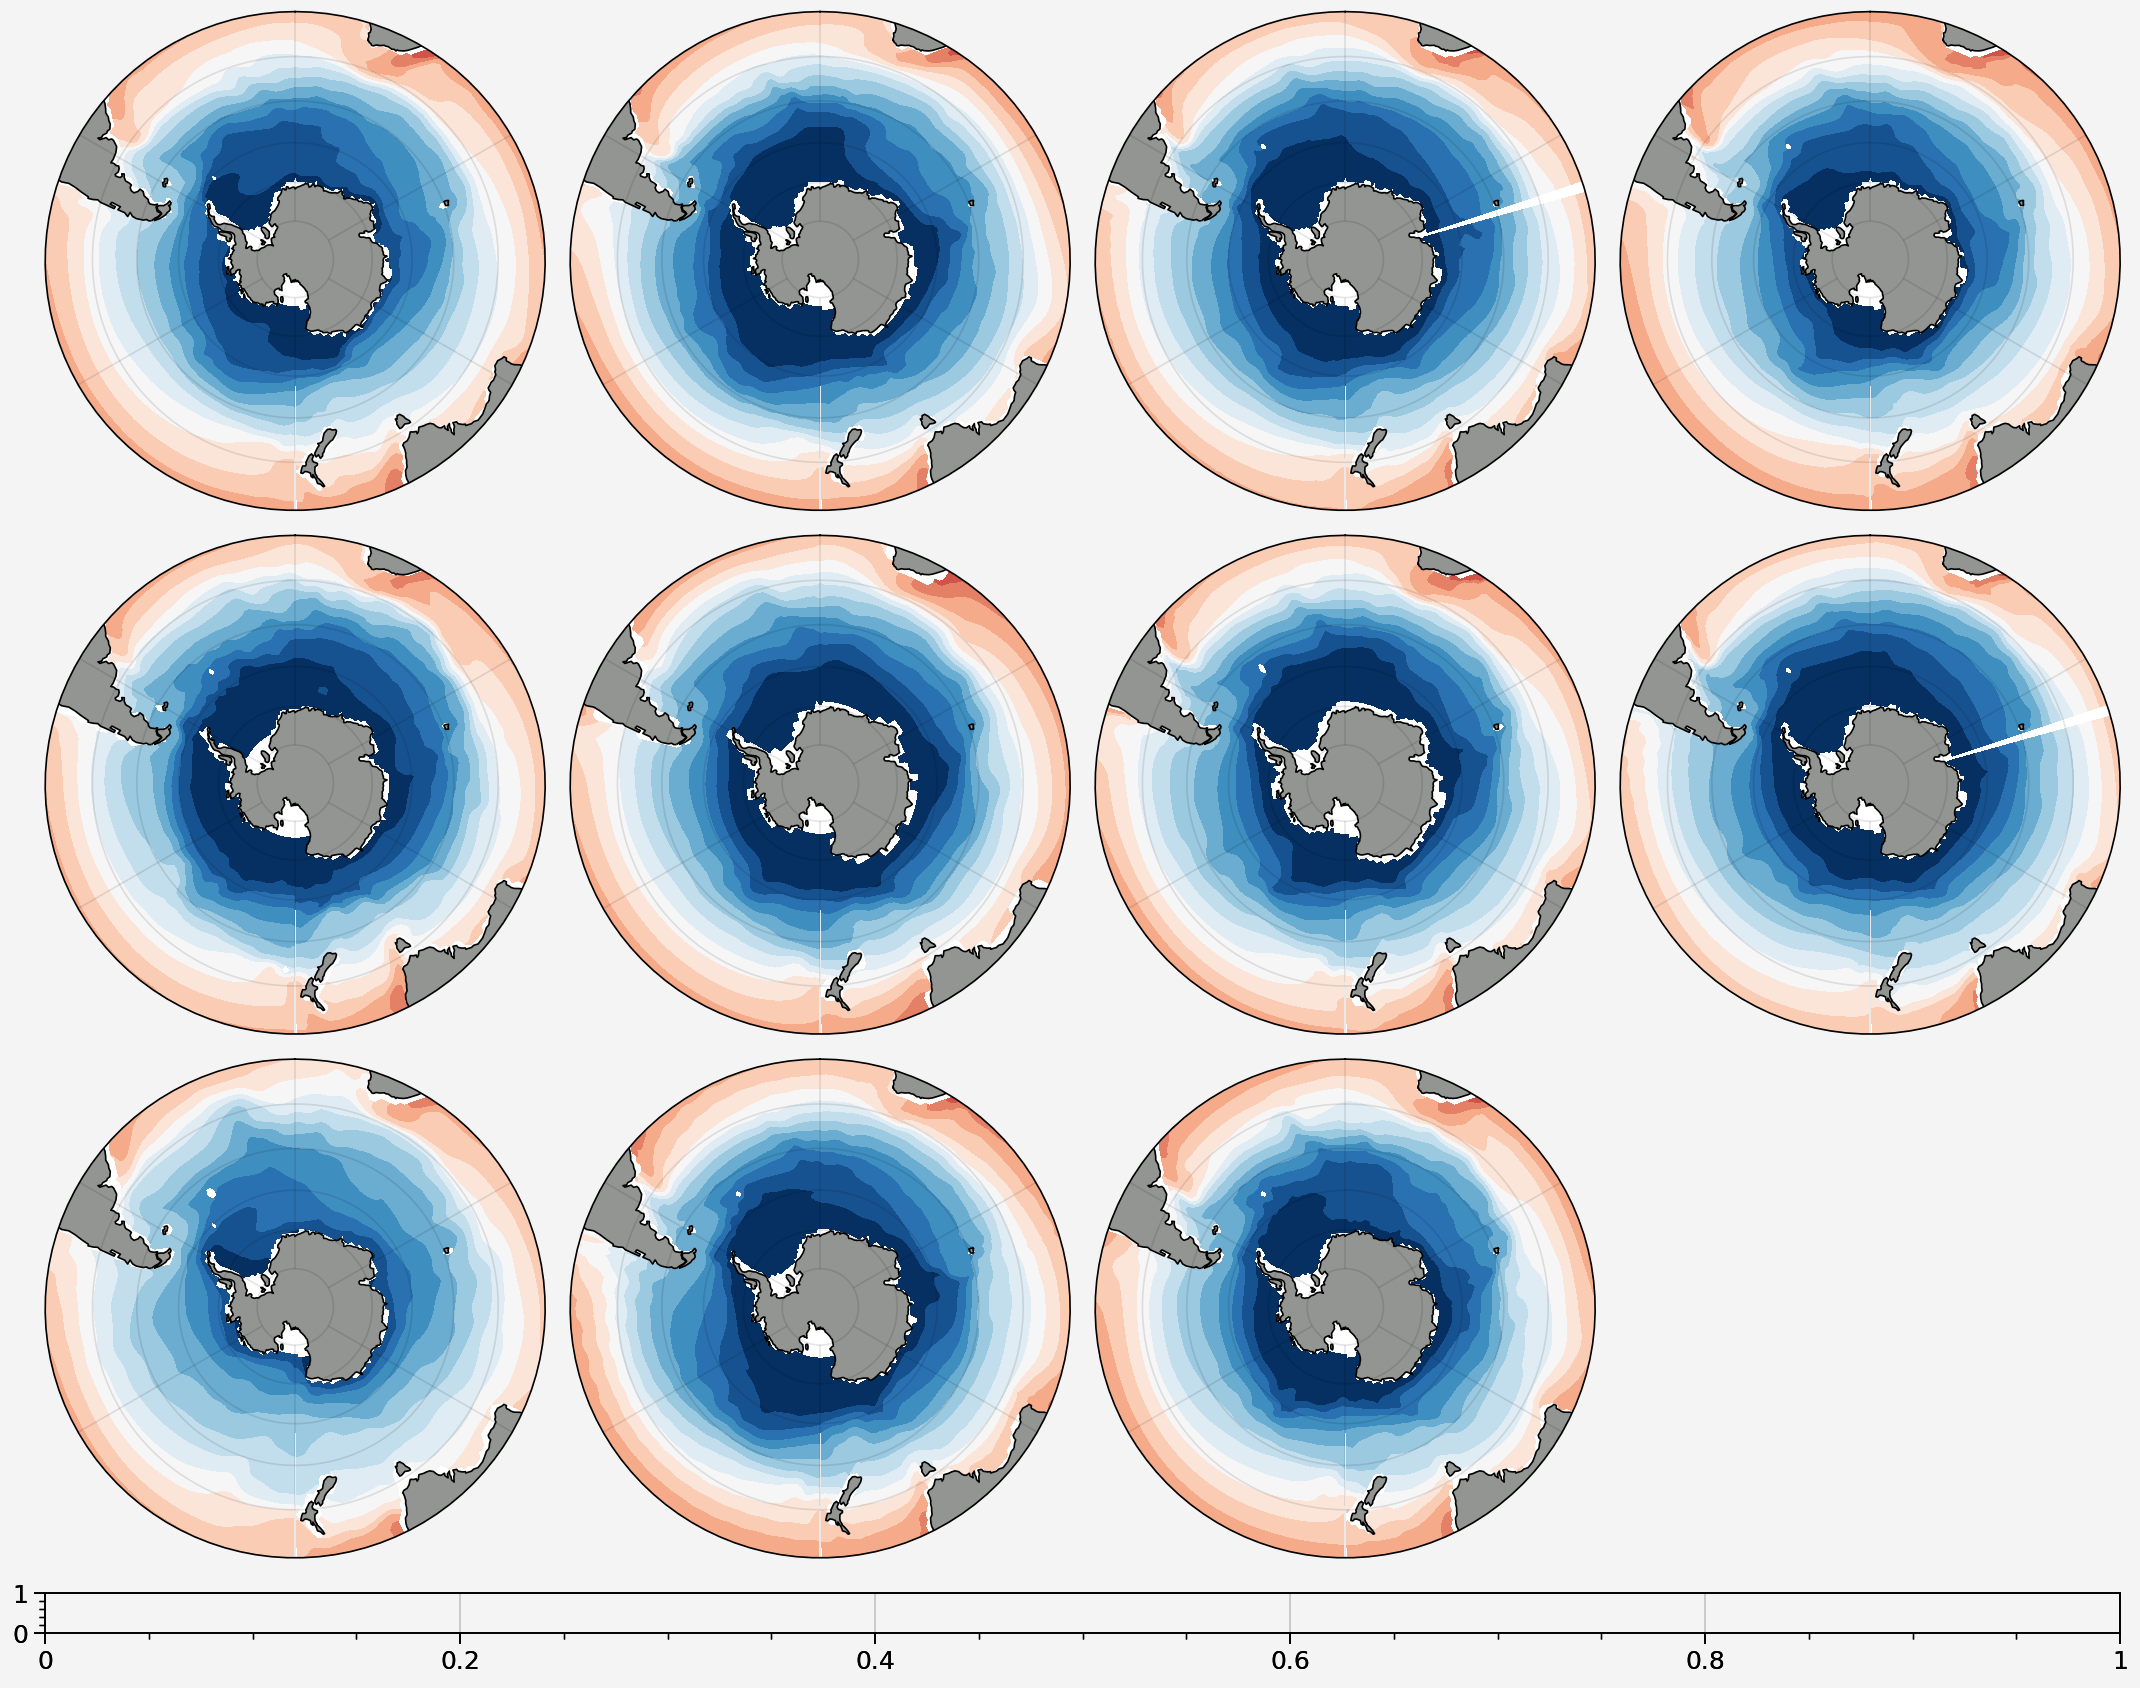

In [21]:
fig=pplt.figure()
pplt.rc['cartopy.circular'] = True
idx=1
levs=np.arange(0,32,2)
for model in models:
    print(model)
    ax=fig.add_subplot(3,4,idx,proj='spstere')

    cmap=plt.cm.get_cmap('RdBu_r')

    ax.format(coast=True,boundinglat=-30,land=True,landcolor='grey')

    ds=lig_mean_regrid[model]
    val=ds.values
    lon=ds.lon.values
    lat=ds.lat.values
    
    map1=ax.contourf(lon,lat,val,\
        cmap=cmap,globe=True,extend='both',levels=levs)
    
    idx+=1
fig.colorbar(map1,loc='b',colspan=(2,3))
fig.savefig('figures/0_test/trial.png')